## Importing Relevant Libraries


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Loading Raw Data and Giving a Quick Look


In [4]:
raw_data = pd.read_csv('1.04.+Real-life+example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocessing of the Data

In [5]:
## Let's explore descriptive statistics of the data before starting the preprocessing processes.

In [6]:
raw_data.describe(include='all')
## Include all to show categorical variables as well.

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [7]:
raw_data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [8]:
data_no_mv = raw_data.dropna(axis = 0)

In [9]:
data_no_mv.describe(include ='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


# Exploring the PDFs

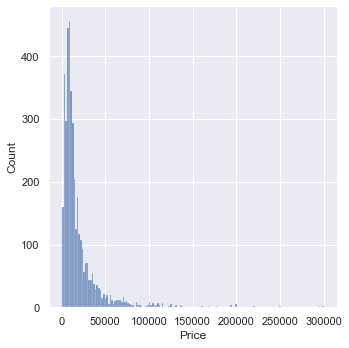

In [10]:
## Exploring probability distribution factors of variables is extremely important for us to decide whether our variables is
## suited for us to use or not. Like does it have normal distribution? does it support 5 main assumptions.
sns.displot(data_no_mv['Price'])

In [11]:
## As we can see we have significant outliers issue here. This can effect us very badly. We need to remove them.
q = data_no_mv['Price'].quantile(0.99)

In [12]:
data1 = data_no_mv[data_no_mv['Price'] < q]

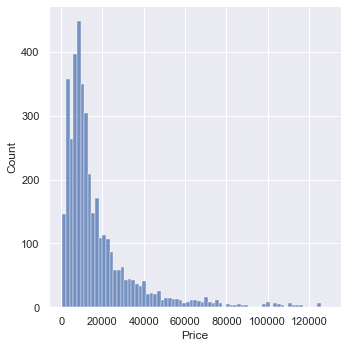

In [13]:
sns.displot(data1['Price'])

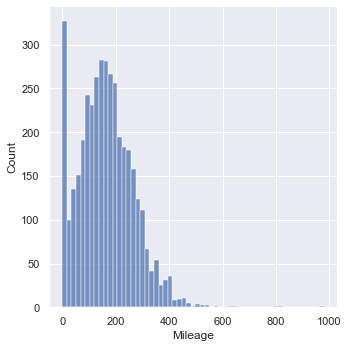

In [14]:
sns.displot(data1['Mileage'])

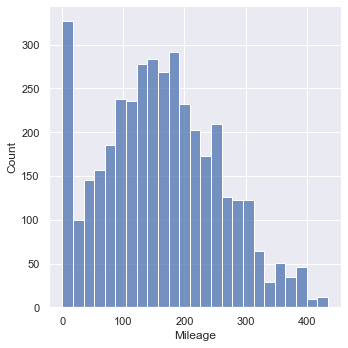

In [15]:
q = data1['Mileage'].quantile(0.99)
data2= data1[data1['Mileage']<q]
sns.displot(data2['Mileage'])

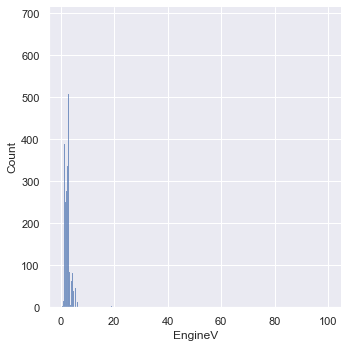

In [16]:
sns.displot(data2['EngineV'])

In [17]:
data2['EngineV'].describe()

count    3944.000000
mean        2.747612
std         4.980406
min         0.600000
25%         1.800000
50%         2.200000
75%         3.000000
max        99.990000
Name: EngineV, dtype: float64

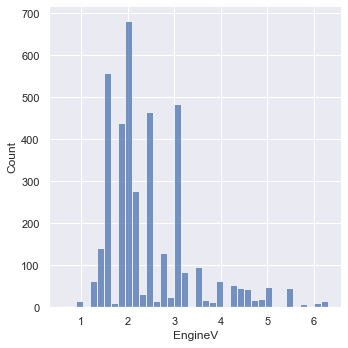

In [18]:
## A car engine volume cannot be 99.99 litres. Mostly max engine volume is 7L, so lets take disregard all the entries higher
## than 7L.
data3 = data2[data2['EngineV']<6.5]
sns.displot(data3['EngineV'])

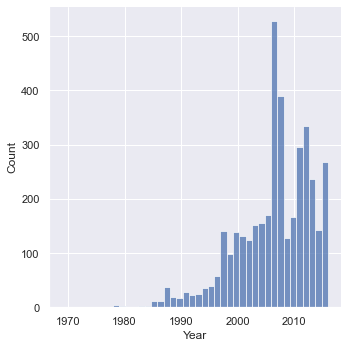

In [19]:
sns.displot(data3['Year'])

In [20]:
data3['Year'].describe()

count    3921.000000
mean     2006.406019
std         6.595871
min      1969.000000
25%      2003.000000
50%      2008.000000
75%      2012.000000
max      2016.000000
Name: Year, dtype: float64

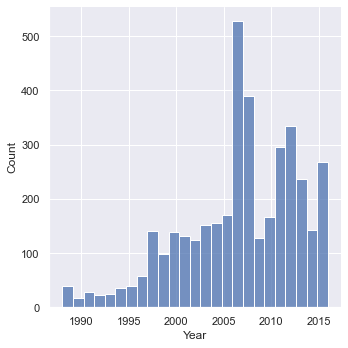

In [21]:
## Here we need to remove the outliners from the beginning.
q = data3['Year'].quantile(0.01)
data4 = data3[data3['Year']> q]
sns.displot(data4['Year'])

In [22]:
## We removed significant amount of observations but we did not reordered the indices. This can lead up to big problems
## lets order observations again
# New column will be created, containing old indices. We do not need it, drop = True to remove that column.
data_cleaned = data4.reset_index(drop = True)

In [23]:
data_cleaned.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000,3867
unique,7,NaN,6,NaN,NaN,4,2,NaN,291
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN,181
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853,NaN
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870,NaN
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,NaN
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000,NaN


# Checking the OLS Assumptions

Text(0.5, 1.0, 'Price and Mileage')

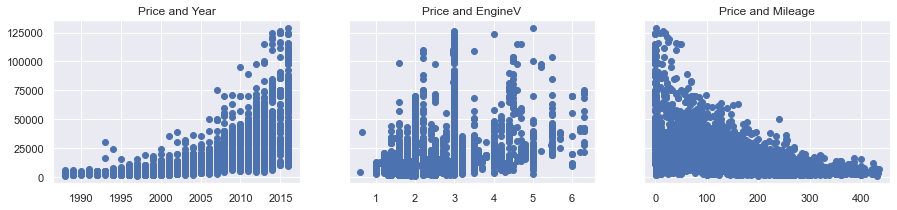

In [24]:
# To check if OLS assumptions are met or not, let's first plot graphs with our dependent variable and other numerical variables
# and go from there.
f , (ax1,ax2,ax3) = plt.subplots(1,3, sharey=True, figsize = (15,3)) #sharey = True beacuse Price is same in 3 plots
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')

In [25]:
# From these plots and pdf of price dependent variable we can see that price has exponential distribution.
# In this case OLS assumption cannot be met. Beacuse it follows exponential we can use log transformation to prevent this.
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
# let's remove our old price variable
data_cleaned = data_cleaned.drop(['Price'],axis = 1)

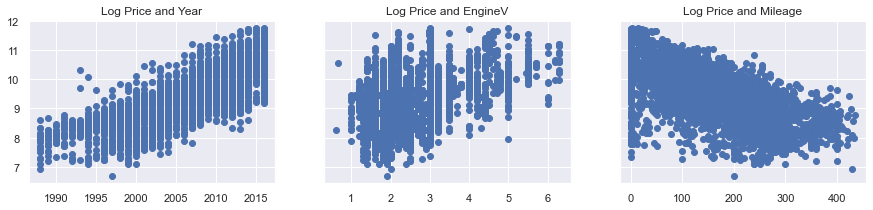

In [26]:
# Let's check the three scatters once again
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')


plt.show()

# The relationships show a clear linear relationship
# This is some good linear regression material

# Alternatively we could have transformed each of the independent variables

In [27]:
##### Checking multicollinearity assumptions ( we assumed to multicollinearity between our variables)


In [28]:
#### we need to use statsmodels for this purpose.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# to make this easier let's combine our numerical variables in one data frame
variables = pd.DataFrame(data_cleaned[['Year','EngineV','Mileage']])
variables

,Year,EngineV,Mileage
0,1991,2.0,277
1,1999,2.9,427
2,2003,5.0,358
3,2007,4.2,240
4,2011,2.0,120
...,...,...,...
3862,2008,2.5,163
3863,2014,1.6,35
3864,2014,3.0,9
3865,1999,3.5,1


In [29]:
# Creating vif dataframe for our variables.
vif = pd.DataFrame()
vif['Variables'] = variables.columns
# calculating vif values
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range (variables.shape[1])]

In [30]:
vif

,Variables,VIF
0,Year,10.354854
1,EngineV,7.662068
2,Mileage,3.791584


In [31]:
## mostly concensus is vifs above 7 is not acceptable so Year is definately not acceptable so we need to remove it.
## but as you can see EngineV is above 7 too. But we do not need to worry about it beacuse when we remove year, it is gonna fall
data_no_multicollinearity=data_cleaned.drop('Year', axis = 1)
data_no_multicollinearity

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Model,log_price
0,BMW,sedan,277,2.0,Petrol,yes,320,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,Sprinter 212,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,S 500,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,Q7,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,Rav 4,9.814656
...,...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.5,Diesel,yes,T5 (Transporter),9.350102
3863,Toyota,sedan,35,1.6,Petrol,yes,Corolla,9.792556
3864,Mercedes-Benz,sedan,9,3.0,Diesel,yes,S 350,11.736069
3865,BMW,sedan,1,3.5,Petrol,yes,535,8.779557


# Creating the Dummy Variables



In [32]:
## To include categorical values we need to create dummy variables.
## To prevent introducing another multicollinearity we need to add drop_first=True (dropping first dummy variable), because 
## first dummy variable can be defined by other dummy variables.
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first = True)
data_with_dummies.head()



,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,277,2.0,8.342840,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,427,2.9,8.974618,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,358,5.0,9.495519,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,240,4.2,10.043249,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,120,2.0,9.814656,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# Rearrenging the Data

In [33]:
## When we removed price and add log_price dependent variable, first place in our data frame changed. It is generally better
## to include dependent variable as first place, in this case let's get log_price to front place.
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Model_100', 'Model_11', 'Model_116', 'Model_118', 'Model_120',
       'Model_19', 'Model_190', 'Model_200', 'Model_210', 'Model_220',
       'Model_230', 'Model_25', 'Model_250', 'Model_300', 'Model_316',
       'Model_318', 'Model_320', 'Model_323', 'Model_325', 'Model_328',
       'Model_330', 'Model_335', 'Model_4 Series Gran Coupe', 'Model_428',
       'Model_4Runner', 'Model_5 Series', 'Model_5 Series GT',
       'Model_520', 'Model_523', 'Model_524', 'Model_525', 'Model_528',
       'Model_530', 'Model_535', 'Model_540', 'Model_545', 'Model_550',
       'Model_6 Series Gran Coupe', 'Model_630', 'Model_640', 'Model_645',
       'Model_650', 'Model_73

In [34]:
# Let's create new columns to include our wanted order.
cols = ['log_price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Model_100', 'Model_11', 'Model_116', 'Model_118', 'Model_120',
       'Model_19', 'Model_190', 'Model_200', 'Model_210', 'Model_220',
       'Model_230', 'Model_25', 'Model_250', 'Model_300', 'Model_316',
       'Model_318', 'Model_320', 'Model_323', 'Model_325', 'Model_328',
       'Model_330', 'Model_335', 'Model_4 Series Gran Coupe', 'Model_428',
       'Model_4Runner', 'Model_5 Series', 'Model_5 Series GT',
       'Model_520', 'Model_523', 'Model_524', 'Model_525', 'Model_528',
       'Model_530', 'Model_535', 'Model_540', 'Model_545', 'Model_550',
       'Model_6 Series Gran Coupe', 'Model_630', 'Model_640', 'Model_645',
       'Model_650', 'Model_730', 'Model_735', 'Model_740', 'Model_745',
       'Model_750', 'Model_760', 'Model_80', 'Model_9', 'Model_90',
       'Model_A 140', 'Model_A 150', 'Model_A 170', 'Model_A 180',
       'Model_A1', 'Model_A3', 'Model_A4', 'Model_A4 Allroad', 'Model_A5',
       'Model_A6', 'Model_A6 Allroad', 'Model_A7', 'Model_A8',
       'Model_ASX', 'Model_Amarok', 'Model_Auris', 'Model_Avalon',
       'Model_Avensis', 'Model_Aygo', 'Model_B 170', 'Model_B 180',
       'Model_B 200', 'Model_Beetle', 'Model_Bora', 'Model_C-Class',
       'Model_CL 180', 'Model_CL 500', 'Model_CL 55 AMG', 'Model_CL 550',
       'Model_CL 63 AMG', 'Model_CLA 200', 'Model_CLA 220',
       'Model_CLA-Class', 'Model_CLC 180', 'Model_CLC 200',
       'Model_CLK 200', 'Model_CLK 220', 'Model_CLK 230', 'Model_CLK 240',
       'Model_CLK 280', 'Model_CLK 320', 'Model_CLK 430', 'Model_CLS 350',
       'Model_CLS 400', 'Model_CLS 500', 'Model_CLS 63 AMG',
       'Model_Caddy', 'Model_Camry', 'Model_Captur', 'Model_Caravelle',
       'Model_Carina', 'Model_Carisma', 'Model_Celica', 'Model_Clio',
       'Model_Colt', 'Model_Corolla', 'Model_Corolla Verso',
       'Model_Cross Touran', 'Model_Dokker', 'Model_Duster',
       'Model_E-Class', 'Model_Eclipse', 'Model_Eos', 'Model_Espace',
       'Model_FJ Cruiser', 'Model_Fluence', 'Model_Fortuner',
       'Model_G 320', 'Model_G 350', 'Model_G 500', 'Model_G 55 AMG',
       'Model_G 63 AMG', 'Model_GL 320', 'Model_GL 350', 'Model_GL 420',
       'Model_GL 450', 'Model_GL 500', 'Model_GL 550', 'Model_GLC-Class',
       'Model_GLE-Class', 'Model_GLK 220', 'Model_GLK 300',
       'Model_GLS 350', 'Model_GLS 400', 'Model_Galant', 'Model_Golf GTI',
       'Model_Golf II', 'Model_Golf III', 'Model_Golf IV',
       'Model_Golf Plus', 'Model_Golf V', 'Model_Golf VI',
       'Model_Golf VII', 'Model_Golf Variant', 'Model_Grand Scenic',
       'Model_Grandis', 'Model_Hiace', 'Model_Highlander', 'Model_Hilux',
       'Model_I3', 'Model_IQ', 'Model_Jetta', 'Model_Kangoo',
       'Model_Koleos', 'Model_L 200', 'Model_LT', 'Model_Laguna',
       'Model_Lancer', 'Model_Lancer Evolution', 'Model_Lancer X',
       'Model_Lancer X Sportback', 'Model_Land Cruiser 100',
       'Model_Land Cruiser 105', 'Model_Land Cruiser 200',
       'Model_Land Cruiser 76', 'Model_Land Cruiser 80',
       'Model_Land Cruiser Prado', 'Model_Latitude', 'Model_Logan',
       'Model_Lupo', 'Model_M5', 'Model_M6', 'Model_MB', 'Model_ML 250',
       'Model_ML 270', 'Model_ML 280', 'Model_ML 320', 'Model_ML 350',
       'Model_ML 400', 'Model_ML 430', 'Model_ML 500', 'Model_ML 550',
       'Model_ML 63 AMG', 'Model_Master', 'Model_Matrix', 'Model_Megane',
       'Model_Modus', 'Model_Multivan', 'Model_New Beetle',
       'Model_Outlander', 'Model_Outlander XL', 'Model_Pajero',
       'Model_Pajero Pinin', 'Model_Pajero Sport', 'Model_Pajero Wagon',
       'Model_Passat B3', 'Model_Passat B4', 'Model_Passat B5',
       'Model_Passat B6', 'Model_Passat B7', 'Model_Passat B8',
       'Model_Passat CC', 'Model_Phaeton', 'Model_Pointer', 'Model_Polo',
       'Model_Previa', 'Model_Prius', 'Model_Q3', 'Model_Q5', 'Model_Q7',
       'Model_R 320', 'Model_R8', 'Model_Rav 4', 'Model_S 140',
       'Model_S 250', 'Model_S 300', 'Model_S 320', 'Model_S 350',
       'Model_S 400', 'Model_S 430', 'Model_S 500', 'Model_S 550',
       'Model_S 600', 'Model_S 63 AMG', 'Model_S 65 AMG', 'Model_S4',
       'Model_S5', 'Model_S8', 'Model_SL 500 (550)', 'Model_SL 55 AMG',
       'Model_SLK 200', 'Model_SLK 350', 'Model_Sandero',
       'Model_Sandero StepWay', 'Model_Scenic', 'Model_Scion',
       'Model_Scirocco', 'Model_Sequoia', 'Model_Sharan', 'Model_Sienna',
       'Model_Smart', 'Model_Space Star', 'Model_Space Wagon',
       'Model_Sprinter 208', 'Model_Sprinter 210', 'Model_Sprinter 211',
       'Model_Sprinter 212', 'Model_Sprinter 213', 'Model_Sprinter 311',
       'Model_Sprinter 312', 'Model_Sprinter 313', 'Model_Sprinter 315',
       'Model_Sprinter 316', 'Model_Sprinter 318', 'Model_Sprinter 319',
       'Model_Symbol', 'Model_Syncro', 'Model_T3 (Transporter)',
       'Model_T4 (Transporter)', 'Model_T4 (Transporter) ',
       'Model_T5 (Transporter)', 'Model_T5 (Transporter) ',
       'Model_T6 (Transporter)', 'Model_T6 (Transporter) ', 'Model_TT',
       'Model_Tacoma', 'Model_Tiguan', 'Model_Touareg', 'Model_Touran',
       'Model_Trafic', 'Model_Tundra', 'Model_Up', 'Model_V 250',
       'Model_Vaneo', 'Model_Vento', 'Model_Venza', 'Model_Viano',
       'Model_Virage', 'Model_Vista', 'Model_Vito', 'Model_X1',
       'Model_X3', 'Model_X5', 'Model_X5 M', 'Model_X6', 'Model_X6 M',
       'Model_Yaris', 'Model_Z3', 'Model_Z4']


In [35]:
data_preprocessed = data_with_dummies[cols]

In [36]:
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,8.342840,277,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8.974618,427,2.9,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9.495519,358,5.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10.043249,240,4.2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9.814656,120,2.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0



# Linear Regression Model

In [37]:
## Creating the Regression Model (targets = y = log_price = dependent variable ,  inputs = x = variables = independent variables
target = data_preprocessed['log_price']
## Inputs are everything but the dependent variable, so we simply take everything except dependent variable.
inputs = data_preprocessed.drop(['log_price'],axis = 1)


In [38]:
## Let's scale the data for better understanding before we make our regression.
from sklearn.preprocessing import StandardScaler
## creating scaler object.
scaler = StandardScaler()
## Fitting the inputs.
scaler.fit(inputs)

StandardScaler()

In [39]:
## Scaling inputs and putting them into new variable.
inputs_scaled = scaler.transform(inputs)

In [40]:
## Train Test Split
# here we will split the data in 4, train the data in train ones and later test them on test ones.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(inputs_scaled , target , test_size = 0.2 , random_state = 42)
# 80-20 split and to keep shufle method we added random_state.



In [41]:
## Creating Regression


In [42]:
reg = LinearRegression()
# fitting regression
reg.fit(x_train,y_train)

LinearRegression()

In [43]:
# Let's check the outputs of the regression:
y_hat = reg.predict(x_train)

Text(0, 0.5, 'y_hat (our prediction)')

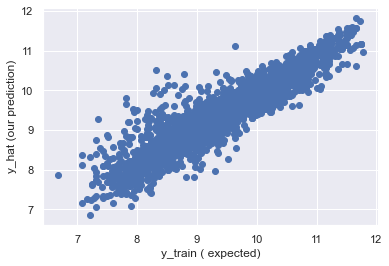

In [44]:
# Simplest way to compare targets is through graph.
# Line being closer to 45 degrees is better for us.
plt.scatter(y_train , y_hat )
plt.xlabel('y_train ( expected)')
plt.ylabel('y_hat (our prediction)')

C:\Users\ykdag\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residual PDF')

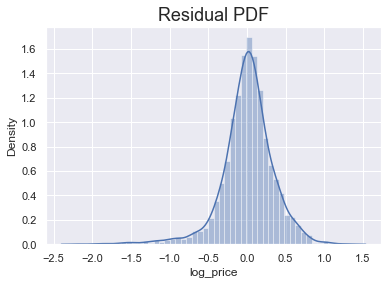

In [57]:
## To observ this graph better let's create difference table. (difference between our prediction and expected value.)
## we will call this residual table.

sns.distplot(y_train - y_hat)
plt.title('Residual PDF',size = 18)

In [58]:
## Checking R-squared value of the model
reg.score(x_train,y_train)

0.8435376265607596

In [75]:
## Finding adjusted R_squared
x_train.shape

(3093, 307)

In [76]:
## n = 3090 , p = 307
## Formula for adjusted R-squared: 1 - (1- R-squared) * (n-1) / ( n- p - 1)

In [77]:
n = x_train.shape[0]
p = x_train.shape[1]
r2 = reg.score(x_train,y_train)

In [79]:
adjusted_r2 = 1 - ( 1 - r2) * (n -1) / (n-p-1)
adjusted_r2

0.8262902482319098

In [80]:
## adjusted R-squared is lower than R-squared so some of the variables does not aid us in our goal we can remove them
## if we want to.


In [81]:
## Let's calculate weights of variables and bias of our model.

In [84]:
## Weights of variables
reg.coef_


array([-3.75263532e-01,  4.36137465e-02, -1.64180117e+12, -1.76908240e+12,
       -1.08683698e+12, -4.15170408e+11, -5.02044972e+12,  1.06059827e+12,
       -6.28903805e-02, -9.52148438e-03, -5.83724976e-02, -5.17578125e-02,
       -3.43017578e-02, -9.79003906e-02, -2.60314941e-02, -1.24023438e-01,
        3.06762695e-01, -2.77423701e+11, -5.05695129e+10,  3.41644287e-02,
        3.84368896e-02, -1.15966797e-02, -7.15068411e+10,  3.84521484e-03,
        1.12304688e-02,  1.08337402e-02,  2.92663574e-02,  8.57543945e-03,
        9.14072962e+11,  6.01196289e-03, -5.78308105e-03,  2.33612061e-02,
        5.17272949e-02,  1.16950989e-01,  2.13623047e-03,  3.33251953e-02,
        3.39355469e-02,  5.52368164e-02, -6.19560514e+11,  2.45437622e-02,
        2.69470215e-02,  1.69234644e+11,  1.91802979e-02,  4.25720215e-02,
        1.56738281e-01,  4.86755371e-02, -1.00708008e-03,  7.74841309e-02,
        6.86340332e-02,  1.10992432e-01,  7.54241943e-02,  2.65197754e-02,
        2.43835449e-02,  

In [85]:
## Bias of our model
reg.intercept_

-199021076521.9095

In [96]:
# Creating a regression summary where we can compare them with one-another
summary_table = pd.DataFrame(inputs.columns.values , columns = ['Features'])
summary_table['Weights'] = reg.coef_
summary_table

,Features,Weights
0,Mileage,-3.752635e-01
1,EngineV,4.361375e-02
2,Brand_BMW,-1.641801e+12
3,Brand_Mercedes-Benz,-1.769082e+12
4,Brand_Mitsubishi,-1.086837e+12
...,...,...
302,Model_X6,1.641846e-01
303,Model_X6 M,5.233765e-02
304,Model_Yaris,6.321525e+11
305,Model_Z3,1.106262e-02


In [97]:
# Once we have trained and fine-tuned our model, we can proceed to testing it
# Testing is done on a dataset that the algorithm has never seen
# Luckily we have prepared such a dataset
# Our test inputs are 'x_test', while the outputs: 'y_test' 
# We SHOULD NOT TRAIN THE MODEL ON THEM, we just feed them and find the predictions
# If the predictions are far off, we will know that our model overfitted
y_hat_test = reg.predict(x_test)

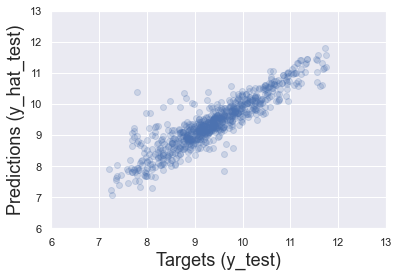

In [99]:
# Create a scatter plot with the test targets and the test predictions
# You can include the argument 'alpha' which will introduce opacity to the graph
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [100]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

<ipython-input-100-981c3b9a4273>:3: RuntimeWarning: overflow encountered in exp
  df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])


,Prediction
0,23354.213928
1,10187.766035
2,0.000000
3,10554.876522
4,7051.692580


In [101]:
# We can also include the test targets in that data frame (so we can manually compare them)
df_pf['Target'] = np.exp(y_test)
df_pf

# Note that we have a lot of missing values
# There is no reason to have ANY missing values, though
# This suggests that something is wrong with the data frame / indexing

,Prediction,Target
0,23354.213928,4200.0
1,10187.766035,NaN
2,0.000000,NaN
3,10554.876522,NaN
4,7051.692580,NaN
...,...,...
769,4295.904820,NaN
770,8853.445743,NaN
771,3280.142317,NaN
772,24976.018581,NaN


In [102]:
# After displaying y_test, we find what the issue is
# The old indexes are preserved (recall earlier in that code we made a note on that)
# The code was: data_cleaned = data_4.reset_index(drop=True)

# Therefore, to get a proper result, we must reset the index and drop the old indexing
y_test = y_test.reset_index(drop=True)

# Check the result
y_test.head()

0    9.966462
1    9.093807
2    8.086410
3    9.392662
4    8.594154
Name: log_price, dtype: float64

In [103]:
# Let's overwrite the 'Target' column with the appropriate values
# Again, we need the exponential of the test log price
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,23354.213928,21300.0
1,10187.766035,8900.0
2,0.000000,3250.0
3,10554.876522,12000.0
4,7051.692580,5400.0
...,...,...
769,4295.904820,4200.0
770,8853.445743,8800.0
771,3280.142317,4850.0
772,24976.018581,27000.0


In [104]:
# Additionally, we can calculate the difference between the targets and the predictions
# Note that this is actually the residual (we already plotted the residuals)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

# Since OLS is basically an algorithm which minimizes the total sum of squared errors (residuals),
# this comparison makes a lot of sense

In [105]:
# Finally, it makes sense to see how far off we are from the result percentage-wise
# Here, we take the absolute difference in %, so we can easily order the data frame
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,23354.213928,21300.0,-2054.213928,9.644197
1,10187.766035,8900.0,-1287.766035,14.469281
2,0.000000,3250.0,3250.000000,100.000000
3,10554.876522,12000.0,1445.123478,12.042696
4,7051.692580,5400.0,-1651.692580,30.586900
...,...,...,...,...
769,4295.904820,4200.0,-95.904820,2.283448
770,8853.445743,8800.0,-53.445743,0.607338
771,3280.142317,4850.0,1569.857683,32.368200
772,24976.018581,27000.0,2023.981419,7.496227


In [106]:
# Exploring the descriptives here gives us additional insights
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,7.740000e+02,774.000000,7.740000e+02,774.000000
mean,inf,17799.988992,-inf,inf
std,NaN,19723.434542,NaN,NaN
min,0.000000e+00,999.000000,-inf,0.089836
25%,7.008789e+03,6700.000000,-1.710200e+03,8.733323
50%,1.121369e+04,11050.000000,2.159344e+02,18.311480
75%,1.983381e+04,20475.000000,2.266076e+03,35.494211
max,inf,125000.000000,7.438066e+04,inf


In [107]:
# Sometimes it is useful to check these outputs manually
# To see all rows, we use the relevant pandas syntax
pd.options.display.max_rows = 999
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
332,3197.13,3200.00,2.87,0.09
262,51978.30,52055.25,76.95,0.15
205,9572.86,9599.00,26.14,0.27
505,3988.61,4000.00,11.39,0.28
730,9867.09,9900.00,32.91,0.33
487,4182.07,4200.00,17.93,0.43
646,11947.11,12000.00,52.89,0.44
705,17884.45,17800.00,-84.45,0.47
736,9949.34,10000.00,50.66,0.51
757,19000.75,19100.00,99.25,0.52


In [ ]:
## So we can generally say that our model does a good joob at predicting values that high, and does poor job at predicting
## low values